Experiment number one: performances over the num

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from src.optimized_code import read_voting_, compute_risk, plurality_outcome_op, veto_outcome_op, borda_outcome_op, for_two_outcome_op, compute_risk_combinations, happiness_level_total,happiness_level
import os
import json
import multiprocessing
from random import randint

In [20]:
voters = 80
iterations = 75

In [21]:
def read_voting_(file_path: str, table_name: str = "voting"):
    with open(file_path) as f:
        voting = json.load(f)[table_name]
        voting = np.array(voting)

    return voting

In [22]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
        
voting3 = read_voting_(path_voting, table_name="three_candidates")
voting4 = read_voting_(path_voting, table_name="four_candidates")
voting5 = read_voting_(path_voting, table_name="five_candidates")


outcomes = [plurality_outcome_op, for_two_outcome_op, veto_outcome_op, borda_outcome_op]

In [23]:
def compute_risks(voting, outcome):
    risks = np.zeros(voters,)
    for i in range(3, voters):
        risks[i] = compute_risk(voting[:, :i], outcome)
    return risks

In [24]:
risks_plurality_array = np.zeros((iterations, voters))
risks_fortwo_array = np.zeros((iterations, voters))
risks_veto_array = np.zeros((iterations, voters))
risks_borda_array = np.zeros((iterations, voters))

for i in range(iterations):
    for num_voters in range(2, voters):  # Changed variable name to avoid conflict
        random_columns = np.random.choice(voting3.shape[1], size=num_voters)
        risks_results = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(compute_risks)(voting3[:,random_columns], outcome) for outcome in outcomes)
        risks_plurality, risks_fortwo, risks_veto, risks_borda = risks_results

        risks_plurality_array[i, num_voters] = np.mean(risks_plurality)
        risks_fortwo_array[i, num_voters] = np.mean(risks_fortwo)
        risks_veto_array[i, num_voters] = np.mean(risks_veto)
        risks_borda_array[i, num_voters] = np.mean(risks_borda)

# Now, you can compute the overall mean for each mechanism outside the loop
overall_risks_plurality = np.mean(risks_plurality_array, axis=0)
overall_risks_fortwo = np.mean(risks_fortwo_array, axis=0)
overall_risks_veto = np.mean(risks_veto_array, axis=0)
overall_risks_borda = np.mean(risks_borda_array, axis=0)



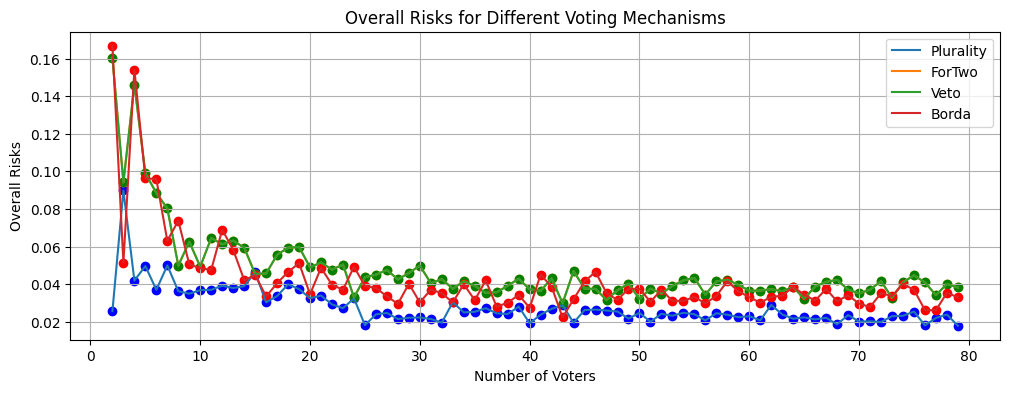

In [25]:
# Define the number of voters
num_voters = range(2, voters)

# Plot the data
plt.figure(figsize=(12, 4))

# Plotting lines for each voting mechanism
plt.plot(num_voters, overall_risks_plurality[2:voters], label='Plurality')
plt.plot(num_voters, overall_risks_fortwo[2:voters], label='ForTwo')
plt.plot(num_voters, overall_risks_veto[2:voters], label='Veto')
plt.plot(num_voters, overall_risks_borda[2:voters], label='Borda')

# Scatter plot for each voting mechanism
plt.scatter(num_voters, overall_risks_plurality[2:voters], color='blue')
plt.scatter(num_voters, overall_risks_fortwo[2:voters], color='orange')
plt.scatter(num_voters, overall_risks_veto[2:voters], color='green')
plt.scatter(num_voters, overall_risks_borda[2:voters], color='red')

plt.xlabel('Number of Voters')
plt.ylabel('Overall Risks')
plt.title('Overall Risks for Different Voting Mechanisms')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
voters = 25
iterations = 100

In [27]:
risks_plurality_array = np.zeros((iterations, voters))
risks_fortwo_array = np.zeros((iterations, voters))
risks_veto_array = np.zeros((iterations, voters))
risks_borda_array = np.zeros((iterations, voters))


for i in range(iterations):
    for num_voters in range(2, voters):  # Changed variable name to avoid conflict
        random_columns = np.random.choice(voting5.shape[1], size=num_voters, replace=False)
        risks_results = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(compute_risks)(voting5[:,random_columns], outcome) for outcome in outcomes)
        risks_plurality, risks_fortwo, risks_veto, risks_borda = risks_results

        risks_plurality_array[i, num_voters] = np.mean(risks_plurality)
        risks_fortwo_array[i, num_voters] = np.mean(risks_fortwo)
        risks_veto_array[i, num_voters] = np.mean(risks_veto)
        risks_borda_array[i, num_voters] = np.mean(risks_borda)

# Now, you can compute the overall mean for each mechanism outside the loop
overall_risks_plurality = np.mean(risks_plurality_array, axis=0)
overall_risks_fortwo = np.mean(risks_fortwo_array, axis=0)
overall_risks_veto = np.mean(risks_veto_array, axis=0)
overall_risks_borda = np.mean(risks_borda_array, axis=0)


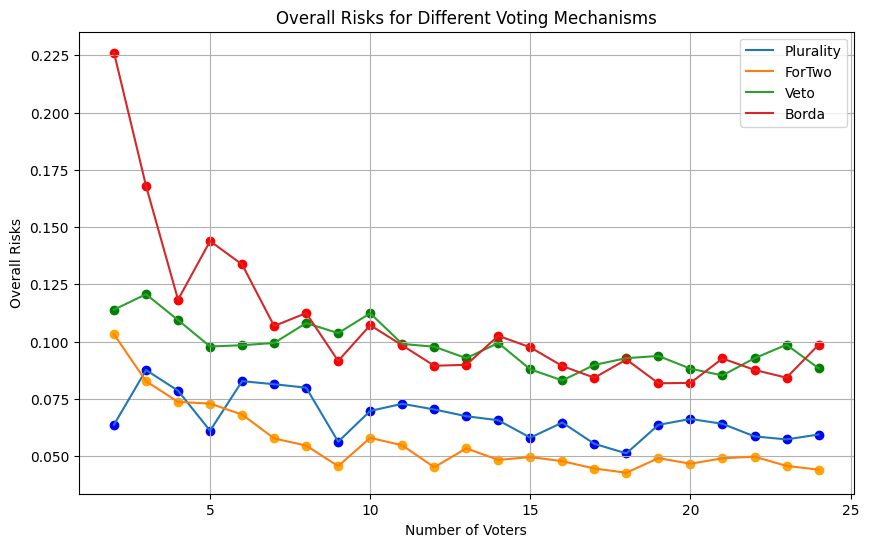

In [28]:
# Define the number of voters
num_voters = range(2, voters)

# Plot the data
plt.figure(figsize=(10, 6))

# Plotting lines for each voting mechanism
plt.plot(num_voters, overall_risks_plurality[2:voters], label='Plurality')
plt.plot(num_voters, overall_risks_fortwo[2:voters], label='ForTwo')
plt.plot(num_voters, overall_risks_veto[2:voters], label='Veto')
plt.plot(num_voters, overall_risks_borda[2:voters], label='Borda')

# Scatter plot for each voting mechanism
plt.scatter(num_voters, overall_risks_plurality[2:voters], color='blue')
plt.scatter(num_voters, overall_risks_fortwo[2:voters], color='orange')
plt.scatter(num_voters, overall_risks_veto[2:voters], color='green')
plt.scatter(num_voters, overall_risks_borda[2:voters], color='red')

plt.xlabel('Number of Voters')
plt.ylabel('Overall Risks')
plt.title('Overall Risks for Different Voting Mechanisms')
plt.legend()
plt.grid(True)
plt.show()